Enter X: 65
Enter Y: 70
Line X on Y: 68.6067798762
Line Y on X: 57.5605422418


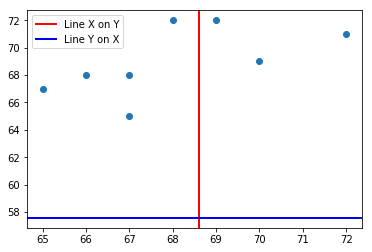

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math

x=np.array([65,66,67,67,68,69,70,72])
y=np.array([67,68,65,68,72,72,69,71])

def correlation(df1,df2):
    sp1=df1
    sp2=df2
    n=sp1.shape[0]
    sp1_squared=sp1**2
    sp2_squared=sp2**2
    sp12=sp1*sp2
    cov=(sp12.sum()/n)-(sp1.mean()*sp2.mean())
    x=(sp1_squared.sum()/n)-(sp1.mean()**2)
    y=(sp2_squared.sum()/n)-(sp2.mean()**2)
    denom=math.sqrt(x*y)
    correlation=cov/denom
    return correlation

def sigma(df1,df2):
    x2=df1**2
    y2=df2**2
    sigma_u2=x2.sum()/float(x.size) - (x.mean()**2)
    sigma_v2=y2.sum()/float(y.size) - (y.mean()**2)
    return sigma_u2,sigma_v2

def square_root(sigma):
    sqrt=[]
    for sig in sigma:
        sqrt.append(math.sqrt(sig))
    return sqrt  

def plot_XY(df1,df2,lx,ly):
    plt.scatter(df1,df2)
    plt.axvline(x=lx, color='r',linewidth=2,label='Line X on Y')
    plt.axhline(y=ly, color='b',linewidth=2,label='Line Y on X')
    plt.legend()
    plt.show()
    
def regression(x,y):
    U=x-x.mean()
    V=y-y.mean()
    r=correlation(x,y)
    u2,v2=square_root(sigma(x,y))
    x1=float(raw_input("Enter X: "))
    y1=float(raw_input("Enter Y: "))
    x=x.mean()+(r*(u2/v2))*(-y.mean())+((r*(u2/v2))*y1)
    y=y.mean()+(r*(v2/u2))*(-x.mean())+((r*(u2/v2))*x1)
    return x,y

    
linex,liney=regression(x,y)    
print "Line X on Y: {}\nLine Y on X: {}".format(linex,liney)
plot_XY(x,y,linex,liney)